<a href="https://colab.research.google.com/github/mwithgod3952/jh_Minor_Projects/blob/main/tr_sales_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install fbprophet plotly

In [1]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode()

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/6Th_class_Prophet_Classification_TimeGan/avocado.csv", index_col=False)
df.tail(3)

Unnamed: 0        Date  AveragePrice  ...     type  year            region
18246           9  2018-01-21          1.87  ...  organic  2018  WestTexNewMexico
18247          10  2018-01-14          1.93  ...  organic  2018  WestTexNewMexico
18248          11  2018-01-07          1.62  ...  organic  2018  WestTexNewMexico

[3 rows x 14 columns]

In [4]:
df = df.drop("Unnamed: 0", axis=1)
df.tail(3)

Date  AveragePrice  Total Volume  ...     type  year            region
18246  2018-01-21          1.87      13766.76  ...  organic  2018  WestTexNewMexico
18247  2018-01-14          1.93      16205.22  ...  organic  2018  WestTexNewMexico
18248  2018-01-07          1.62      17489.58  ...  organic  2018  WestTexNewMexico

[3 rows x 13 columns]

In [5]:
df_Date =   df['Date'].unique()
df_type =   df['type'].unique()
df_region = df['region'].unique()
print("Date_shape", df_Date.shape, " / ", "type_shape", df_type.shape, " / ", "region_shape", df_region.shape)

Date_shape (169,)  /  type_shape (2,)  /  region_shape (54,)


In [6]:
df_as_ts = df.copy()
df_as_ts['Date'] = pd.to_datetime(df_as_ts['Date'])
type(df_as_ts['Date'])

pandas.core.series.Series

In [7]:
df_as_ts.index = df_as_ts['Date']

In [8]:
print("numbers of factor about region : ", df_as_ts["region"].unique().shape)
print("=" * 39)
print("factors of region : ")
for x in range(len(df_as_ts["region"].unique())):
    print(df_as_ts["region"].unique()[x])

numbers of factor about region :  (54,)
factors of region : 
Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis
Jacksonville
LasVegas
LosAngeles
Louisville
MiamiFtLauderdale
Midsouth
Nashville
NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando
Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland
RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego
SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane
StLouis
Syracuse
Tampa
TotalUS
West
WestTexNewMexico


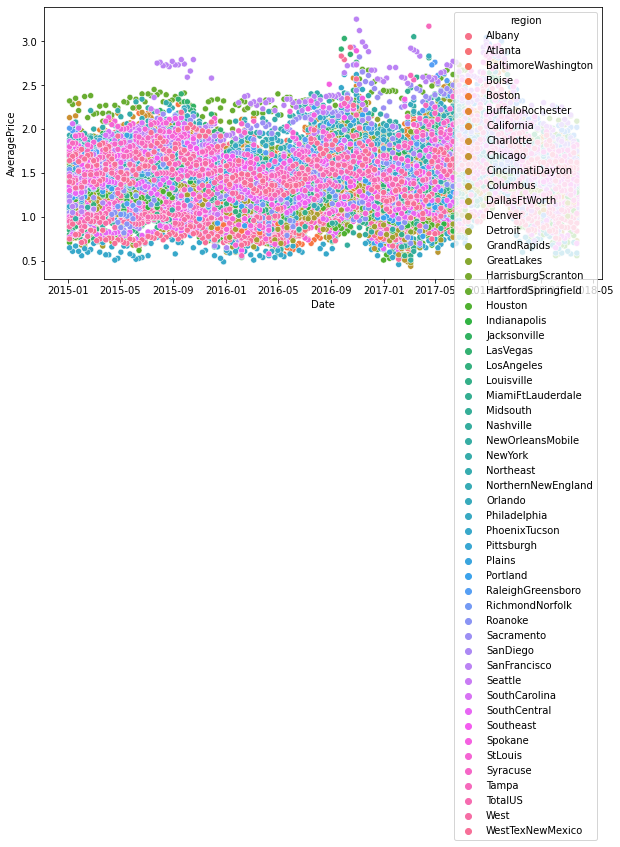

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_as_ts.index, df_as_ts['AveragePrice'], data=df_as_ts, hue="region")
plt.show()

In [10]:
lst = []
for i in range(len(df_as_ts["region"].unique())):
    lst.append(df_as_ts.iloc[np.where(df_as_ts["region"] == df_as_ts["region"].unique()[i])])
np.shape(lst)   

(54,)

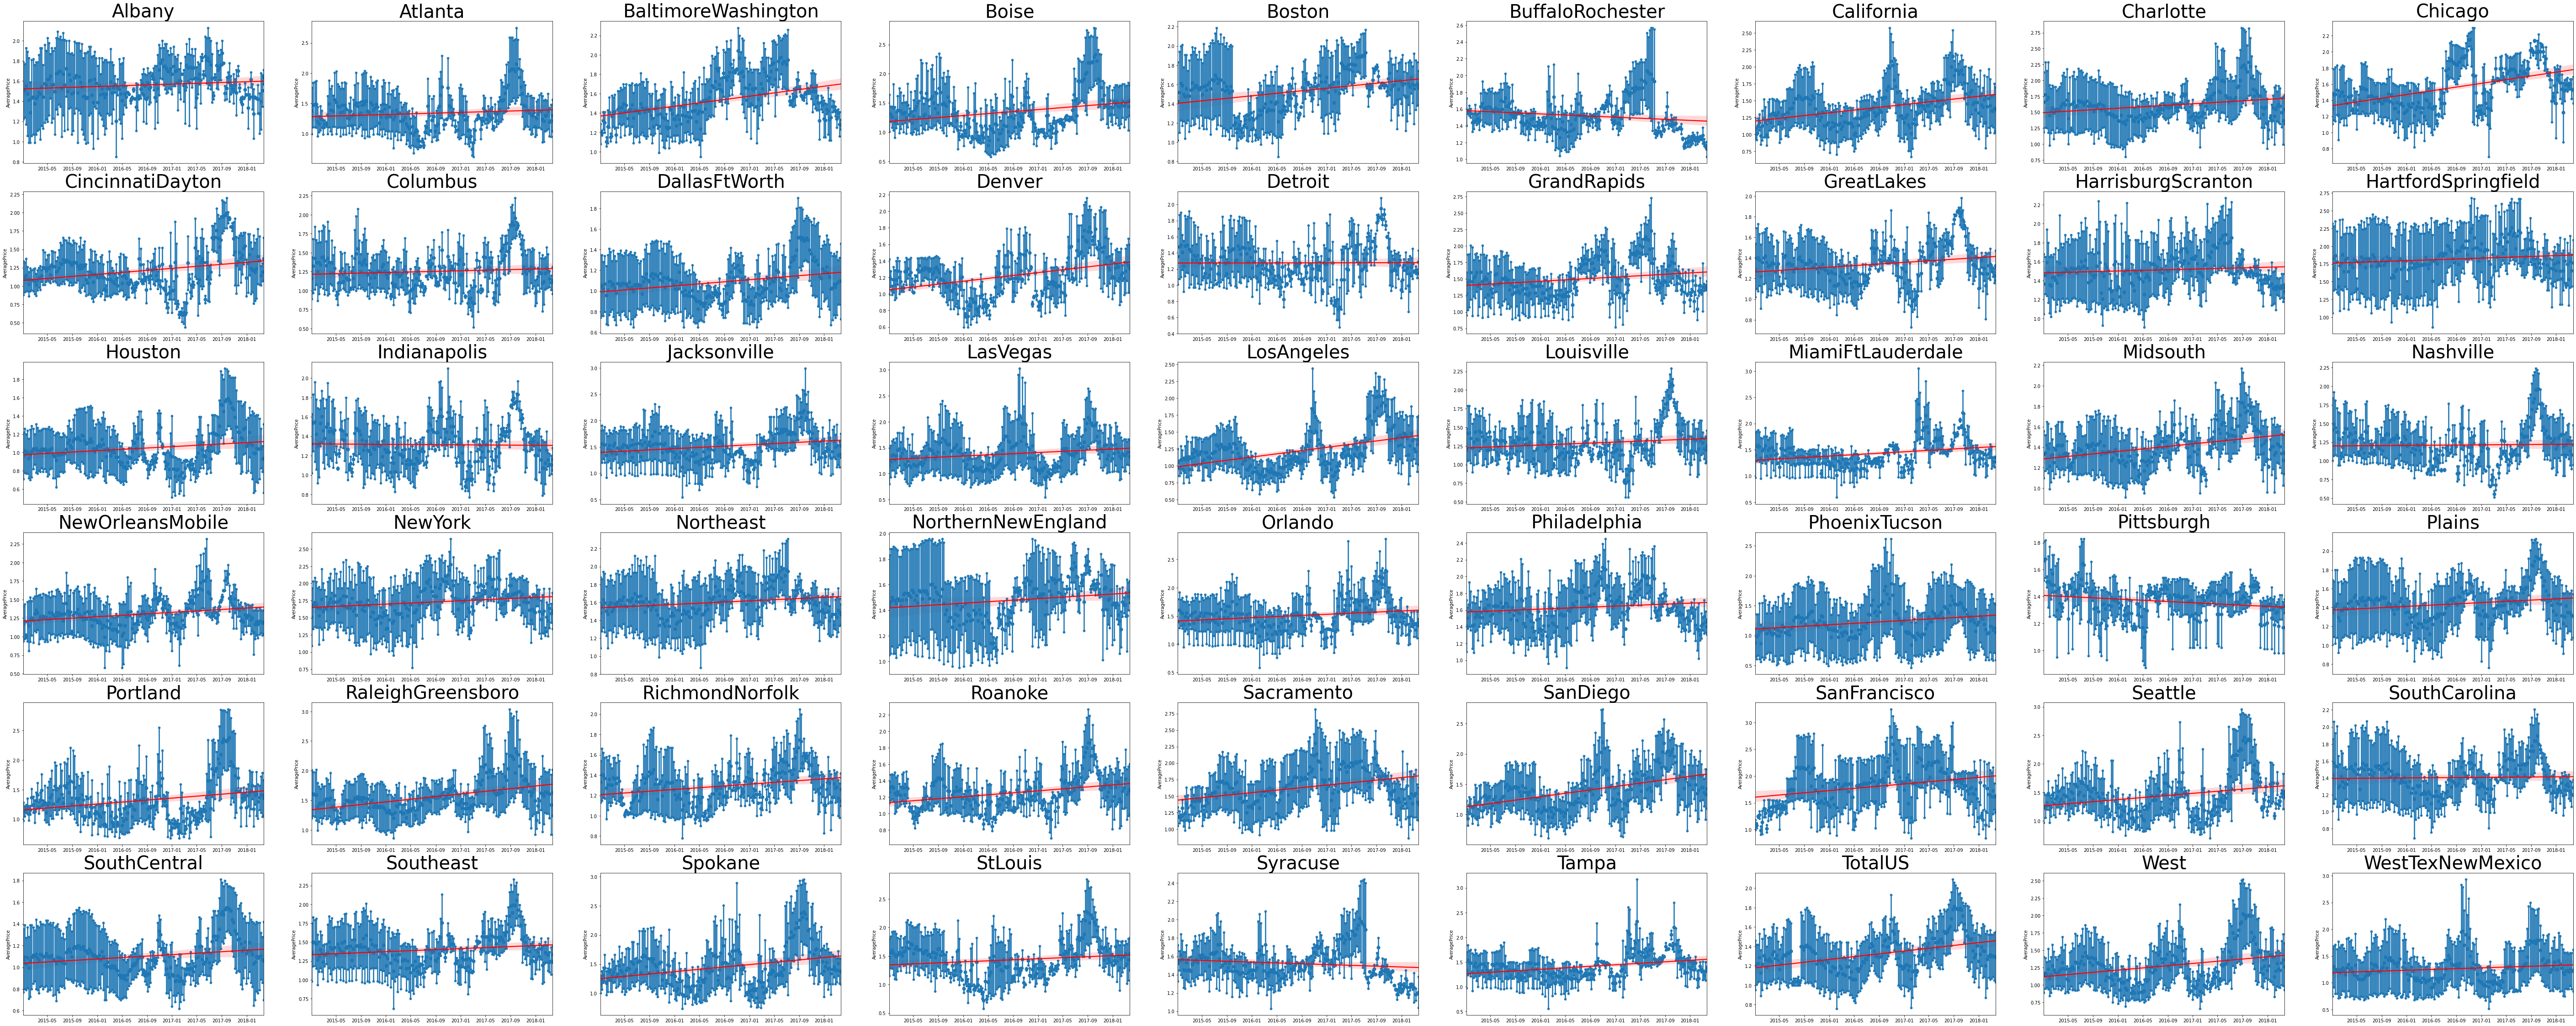

In [11]:
plt.figure(figsize=(100, 40))
n = 0
for x in lst:

   ax = plt.subplot(6, 9, n+1) 

   X = np.array(x.index.to_pydatetime(), dtype=np.datetime64) 
   Y = x["AveragePrice"]

   ax.xaxis.update_units(X)
   sns.scatterplot(X, Y)
   sns.regplot(x=ax.xaxis.convert_units(X), y=Y, data=x, x_estimator=np.mean, logx=True, line_kws={"color": "red"})
   ax.set_title(x.region.unique()[0], fontsize=40)

   n = n+1 

***regplot 결과값 분해***